<a href="https://colab.research.google.com/github/sosweetcelestia/heart_disease_prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem:**

> In this project, we examine a dataset that contains a variety of health parameters, such as age, blood pressure, heart rate, and more, from **heart patients**. Our objective is to create a predictive model that can correctly diagnose people with heart disease. Recall for the positive class is a crucial metric, as our main focus is on making sure the model recognizes all potential patients, given the grave implications of missing a positive diagnosis.

# **Objectives**

> **Explore the Dataset:** Uncover patterns, distributions, and relationships within the data.

> **Conduct Extensive Exploratory Data Analysis (EDA):** Dive deep into bivariate relationships against the target.

> **Preprocessing Steps:**
- Remove irrelevant features
- Address missing values
- Treat outliers
- Encode categorical variables
- Transform skewed features to achieve normal-like distributions

> **Model Building:**
- Establish pipelines for models that require scaling
- Implement and tune classification models including KNN, SVM, Decision Trees, and Random Forest
- Emphasize achieving high recall for class 1, ensuring comprehensive identification of heart patients

> **Evaluate and Compare Model Performance:** Utilize precision, recall, and F1-score to gauge models' effectiveness.

## **Step 1 | Import Libraries**

In [51]:
# Step 1: Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [52]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

## **Step 2 | Read Dataset**

In [53]:
# Step 2: Read Dataset
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### **Dataset Description**

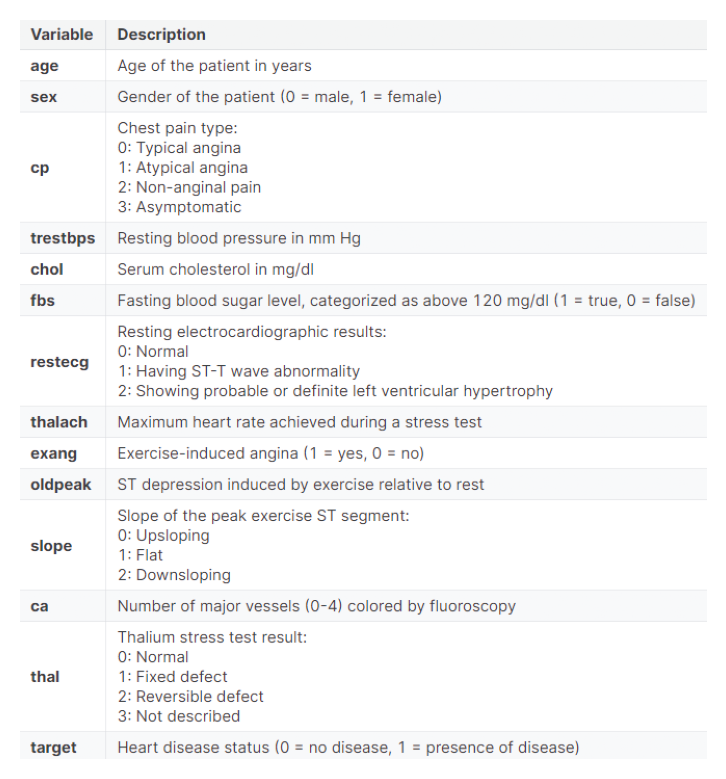

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = '/content/data_description.png'

# Read the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


## **Step 3 | Dataset Overview**

### **Step 3.1 | Dataset Basic Information**

In [55]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Inferences:**
>**Number of Entries:** The dataset consists of 303 entries, ranging from index 0 to 302.

>**Columns:** There are 14 columns in the dataset corresponding to various attributes of the patients and results of tests.

>**Data Types:**
- Most of the columns (13 out of 14) are of the int64 data type.
- Only the oldpeak column is of the float64 data type.

>**Missing Values:** There don't appear to be any missing values in the dataset as each column has 303 non-null entries.

**Note:** Based on the data types and the feature exlainations we had earlier, some features should be converted to string (object) data type for proper analysis and interpretation.

In [56]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_converted = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_converted] = df[features_to_converted].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

### **Step 3.2 | Summary Statistics for Numerical Variables**

In [57]:
# Step 3.2: Summary Statistics for Numerical Variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Numerical Features:**

>**age:** The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.

>**trestbps:** The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.

> **chol:**The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.

> **thalach:** The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.

> **oldpeak:** The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.

### **Step 3.3 | Summary Statistics for Categorical Variables**

In [58]:
# Step 3.3: Summary Statistics for Categorical Variables
# Get the summary statistics for categorical variables
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


**Categorical Features (object data type):**

>**sex:** There are two unique values, with males (denoted as 0) being the most frequent category, occurring 207 times out of 303 entries.

> **cp:** Four unique types of chest pain are present. The most common type is "0", occurring 143 times.

> **fbs:** There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.

> **restecg:** Three unique results are present. The most common result is "1", appearing 152 times.

> **exang:** There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 204 times.

> **slope:** Three unique slopes are present. The most frequent slope type is "2", which occurs 142 times.

> **ca:** There are five unique values for the number of major vessels colored by fluoroscopy, with "0" being the most frequent, occurring 175 times.

> **thal:** Four unique results are available. The most common type is "2" (indicating a reversible defect), observed 166 times.

> **target:** Two unique values indicate the presence or absence of heart disease. The value "1" (indicating the presence of heart disease) is the most frequent, observed in 165 entries.





## **Step 4 | EDA**

For our **Exploratory Data Analysis (EDA)**, we'll take it in two main steps:

1. **Univariate Analysis:** Here, we'll focus on one feature at a time to understand its distribution and range.

2. **Bivariate Analysis:** In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: **predicting the target variable.**

### **Step 4.1 | Univariate Analysis**

We undertake univariate analysis on the dataset's features, based on their datatype:

1.   **For continuous data:** We employ histograms to gain insight into the
distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.
2.   **For categorical data:** Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

#### **Step 4.1.1 | Numerical Variables Univariate Analysis**

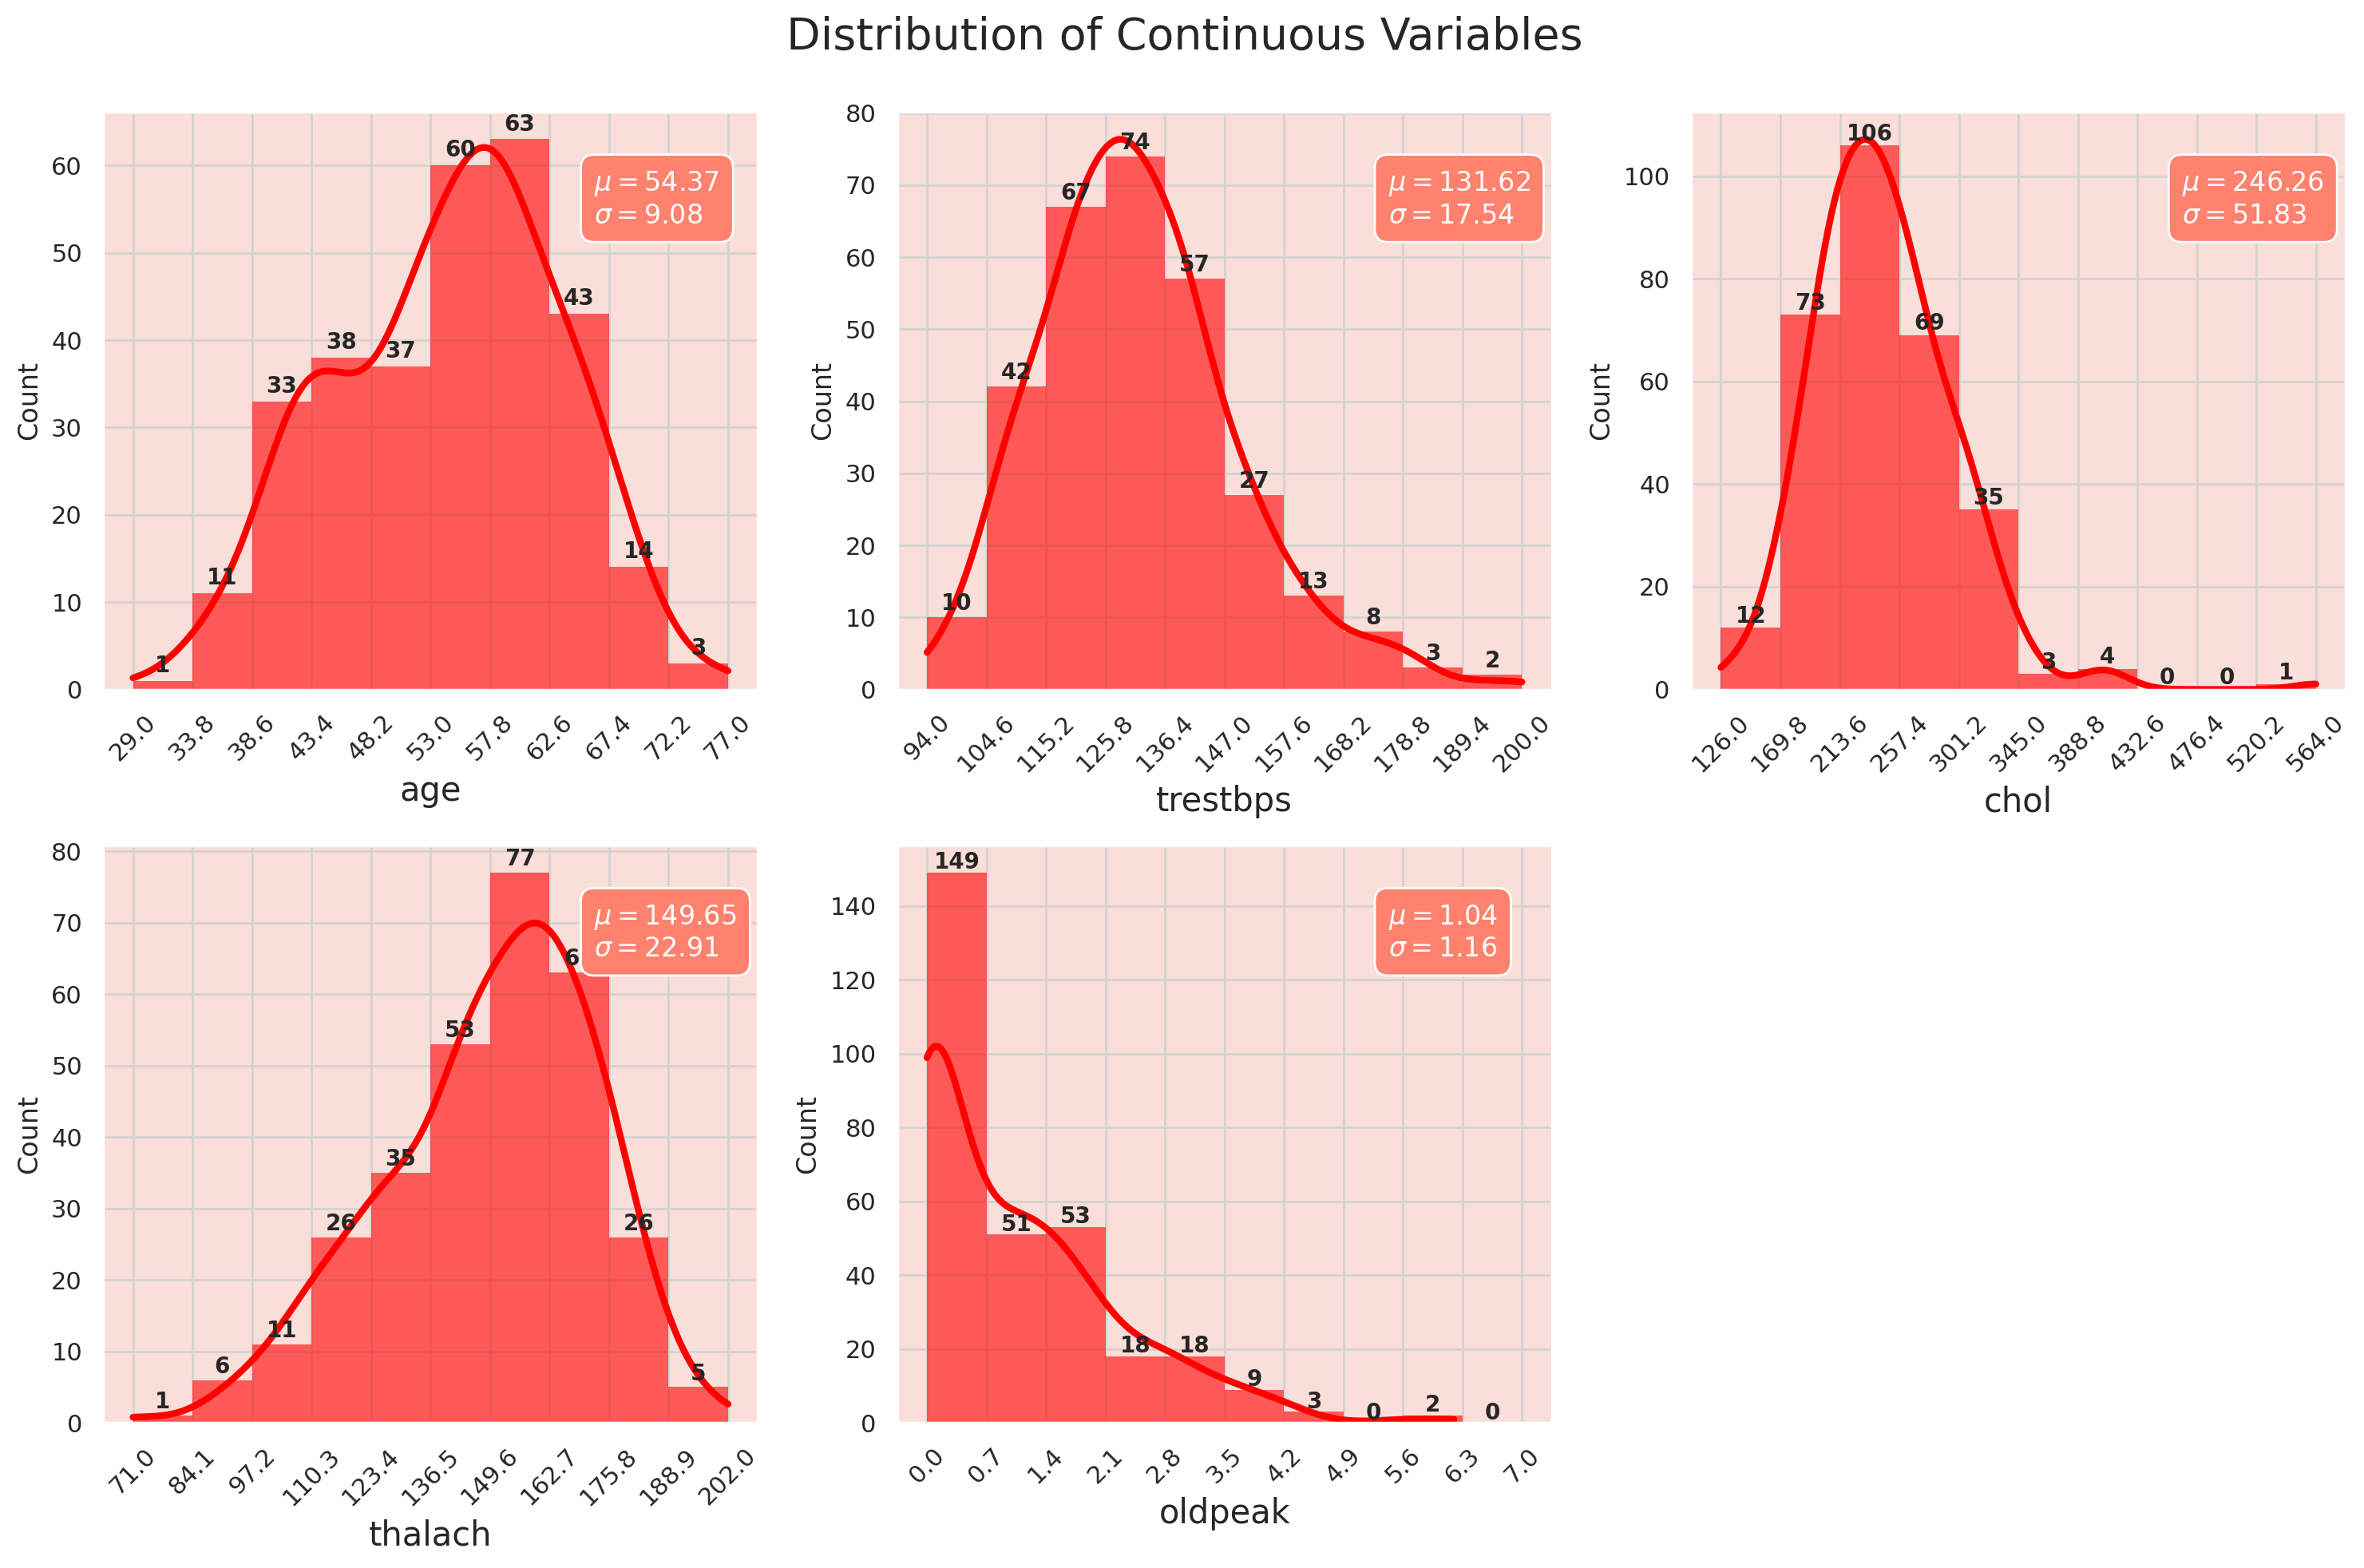

In [59]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Inferences:**

>**Age (age):**The distribution is somewhat uniform, but there's a peak around the late 50s. The mean age is approximately 54.37 years with a standard deviation of 9.08 years.

> **Resting Blood Pressure (trestbps):** The resting blood pressure for most individuals is concentrated around 120-140 mm Hg, with a mean of approximately 131.62 mm Hg and a standard deviation of 17.54 mm Hg.

> **Serum Cholesterol (chol):** Most individuals have cholesterol levels between 200 and 300 mg/dl. The mean cholesterol level is around 246.26 mg/dl with a standard deviation of 51.83 mg/dl.

> **Maximum Heart Rate Achieved (thalach):** The majority of the individuals achieve a heart rate between 140 and 170 bpm during a stress test. The mean heart rate achieved is approximately 149.65 bpm with a standard deviation of 22.91 bpm.

> **ST Depression Induced by Exercise (oldpeak):** Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise. The mean ST depression value is 1.04 with a standard deviation of 1.16.

*Upon reviewing the histograms of the continuous features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges.**There doesn't seem to be any noticeable noise or implausible values among the continuous variables**.*


#### **Step 4.1.2 | Categorical Variables Univariate Analysis**

In [60]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

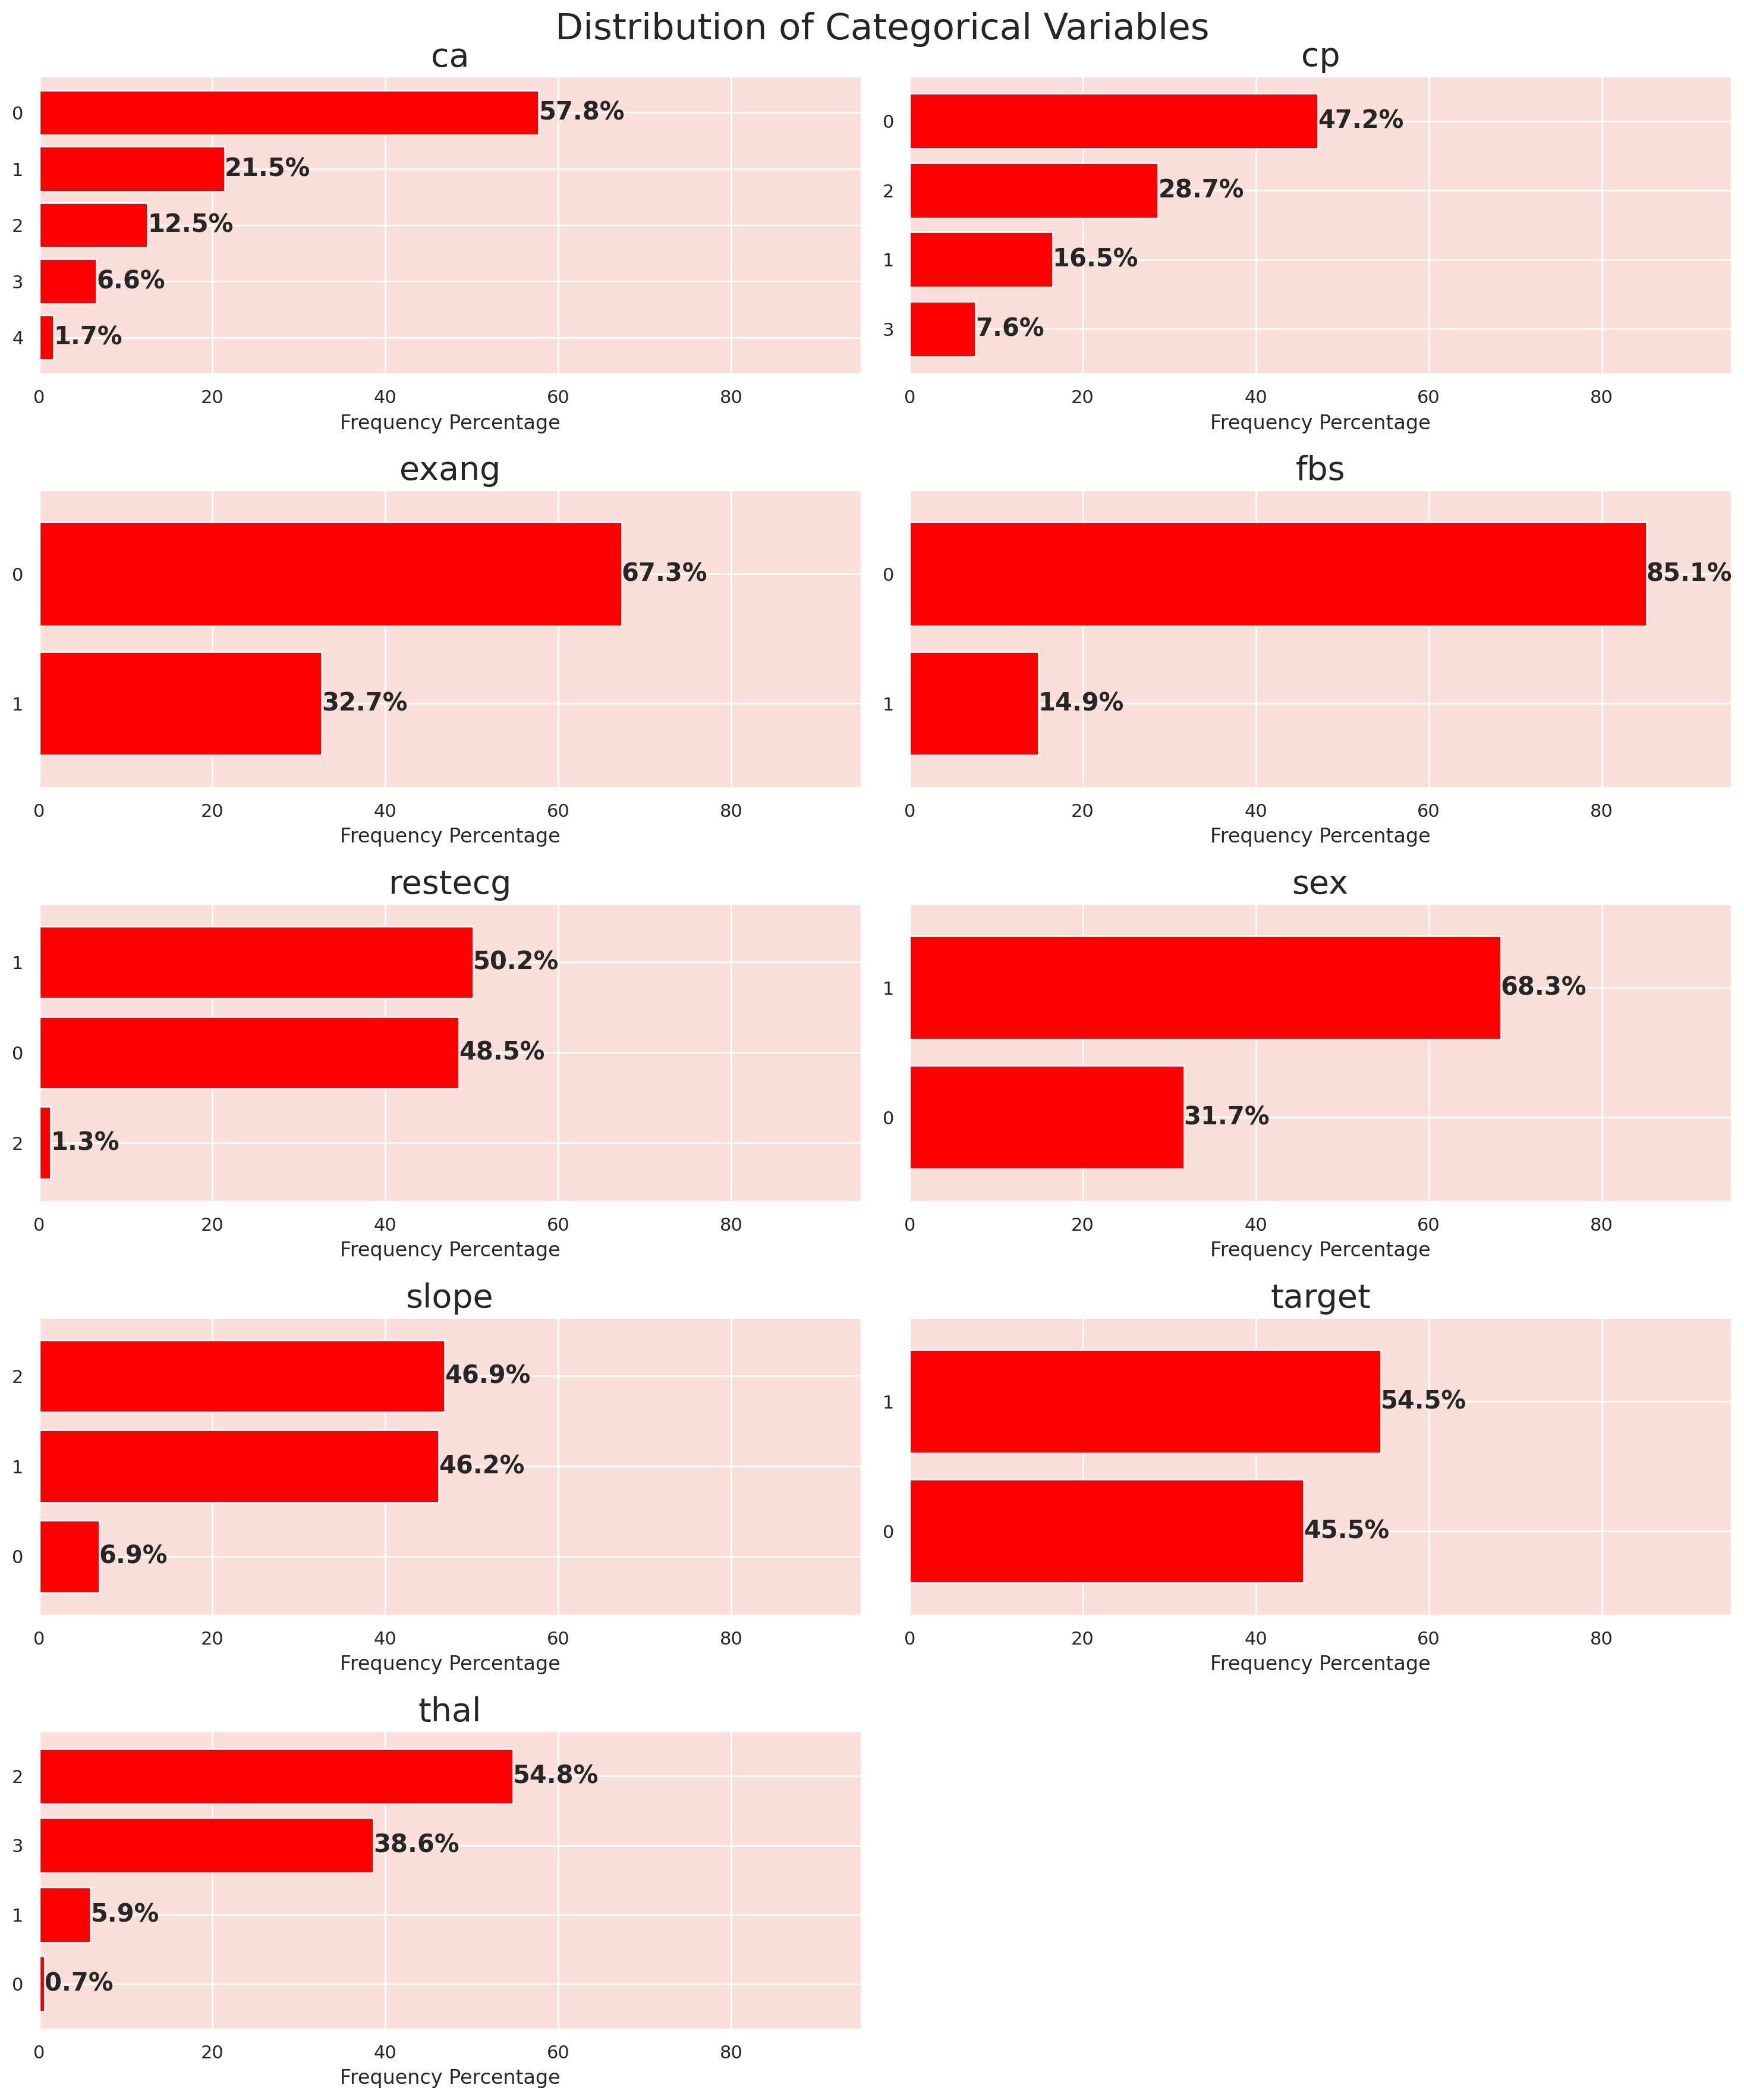

In [61]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

**Inferences:**

>**Gender (sex):** The dataset is predominantly female, constituting a significant majority.

>**Type of Chest Pain (cp):** The dataset shows varied chest pain types among patients. Type 0 (Typical angina) seems to be the most prevalent, but an exact distribution among the types can be inferred from the bar plots.

>**Fasting Blood Sugar (fbs):** A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.

>**Resting Electrocardiographic Results (restecg):** The results show varied resting electrocardiographic outcomes, with certain types being more common than others. The exact distribution can be gauged from the plots.

>**Exercise-Induced Angina (exang):** A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset.

>**Slope of the Peak Exercise ST Segment (slope):** The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots.

>**Number of Major Vessels Colored by Fluoroscopy (ca):** Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.

>**Thalium Stress Test Result (thal):** The dataset displays a variety of thalium stress test results. One particular type seems to be more prevalent, but the exact distribution can be seen in the plots.

>**Presence of Heart Disease (target):** The dataset is nearly balanced in terms of heart disease presence, with about 54.5% having it and 45.5% not having it.

### **Step 4.2 | Bivariate Analysis**

For our **bivariate analysis** on the dataset's features with respect to the target variable:

> **For continuous data:**I am going to use **bar plots** to showcase the average value of each feature for the different target classes, and **KDE plots** to understand the distribution of each feature across the target classes. This aids in discerning how each feature varies between the two target outcomes.

> **For categorical data:** I am going to employ **100% stacked bar plots** to depict the proportion of each category across the target classes. This offers a comprehensive view of how different categories within a feature relate to the target.

Through these visualization techniques, we are going to gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.

#### **Step 4.2.1 | Numerical Features vs Target**

I am going to visualize each continuous feature against the target using two types of charts:

*   **Bar plots** - showing the mean values.
*   **KDE plots** - displaying the distribution for each target category.



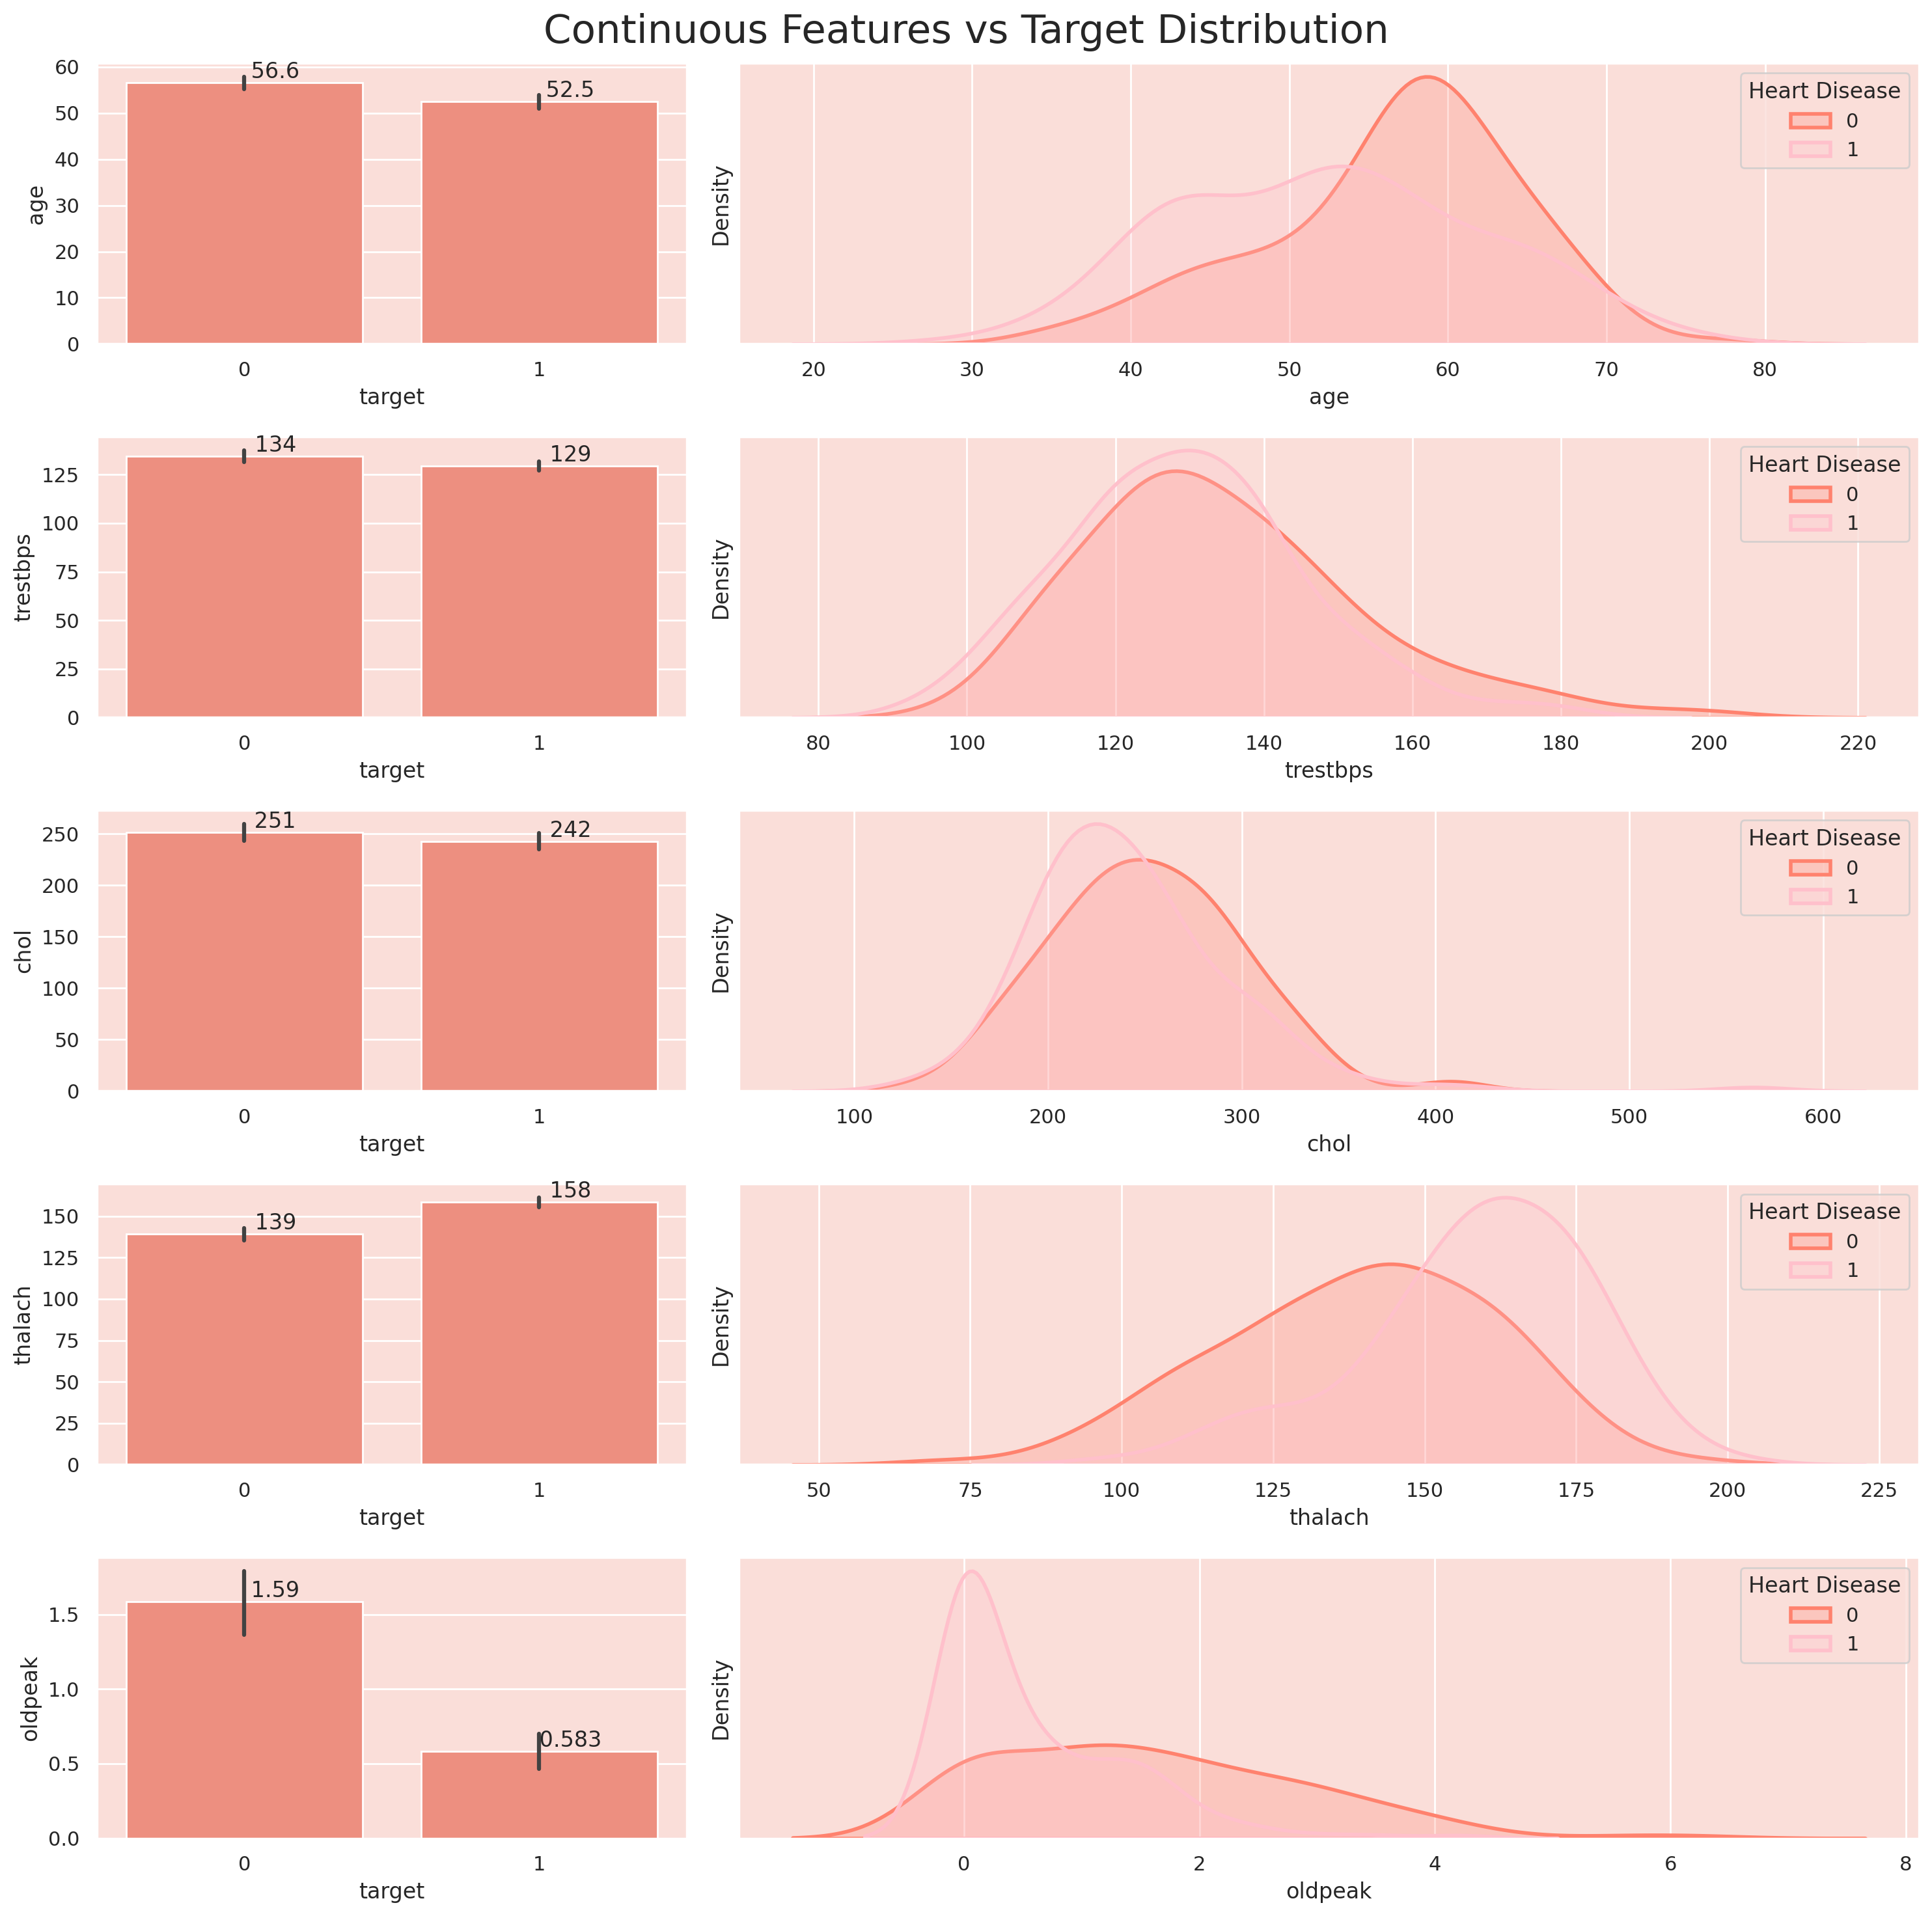

In [62]:
# Set color palette
sns.set_palette(['#ff826e', 'pink'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

**Inferences:**

>**Age (age):** The distributions show a slight shift with patients having heart disease being a bit younger on average than those without. The mean age for patients without heart disease is higher.

>**Resting Blood Pressure (trestbps):** Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.

>**Serum Cholesterol (chol):** The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.

>**Maximum Heart Rate Achieved (thalach):** There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.

>**ST Depression (oldpeak):** The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. Their distribution peaks near zero, whereas the non-disease category has a wider spread.

Based on the visual difference in distributions and mean values, **Maximum Heart Rate (thalach)** seems to have the most impact on the heart disease status, followed by **ST Depression (oldpeak)** and **Age (age)**.

#### **Step 4.2.2 | Categorical Features vs Target**

I am going to display **100% stacked bar plots** for each categorical feature illustrating the proportion of each category across the two target classes, complemented by the exact counts and percentages on the bars.

In [63]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

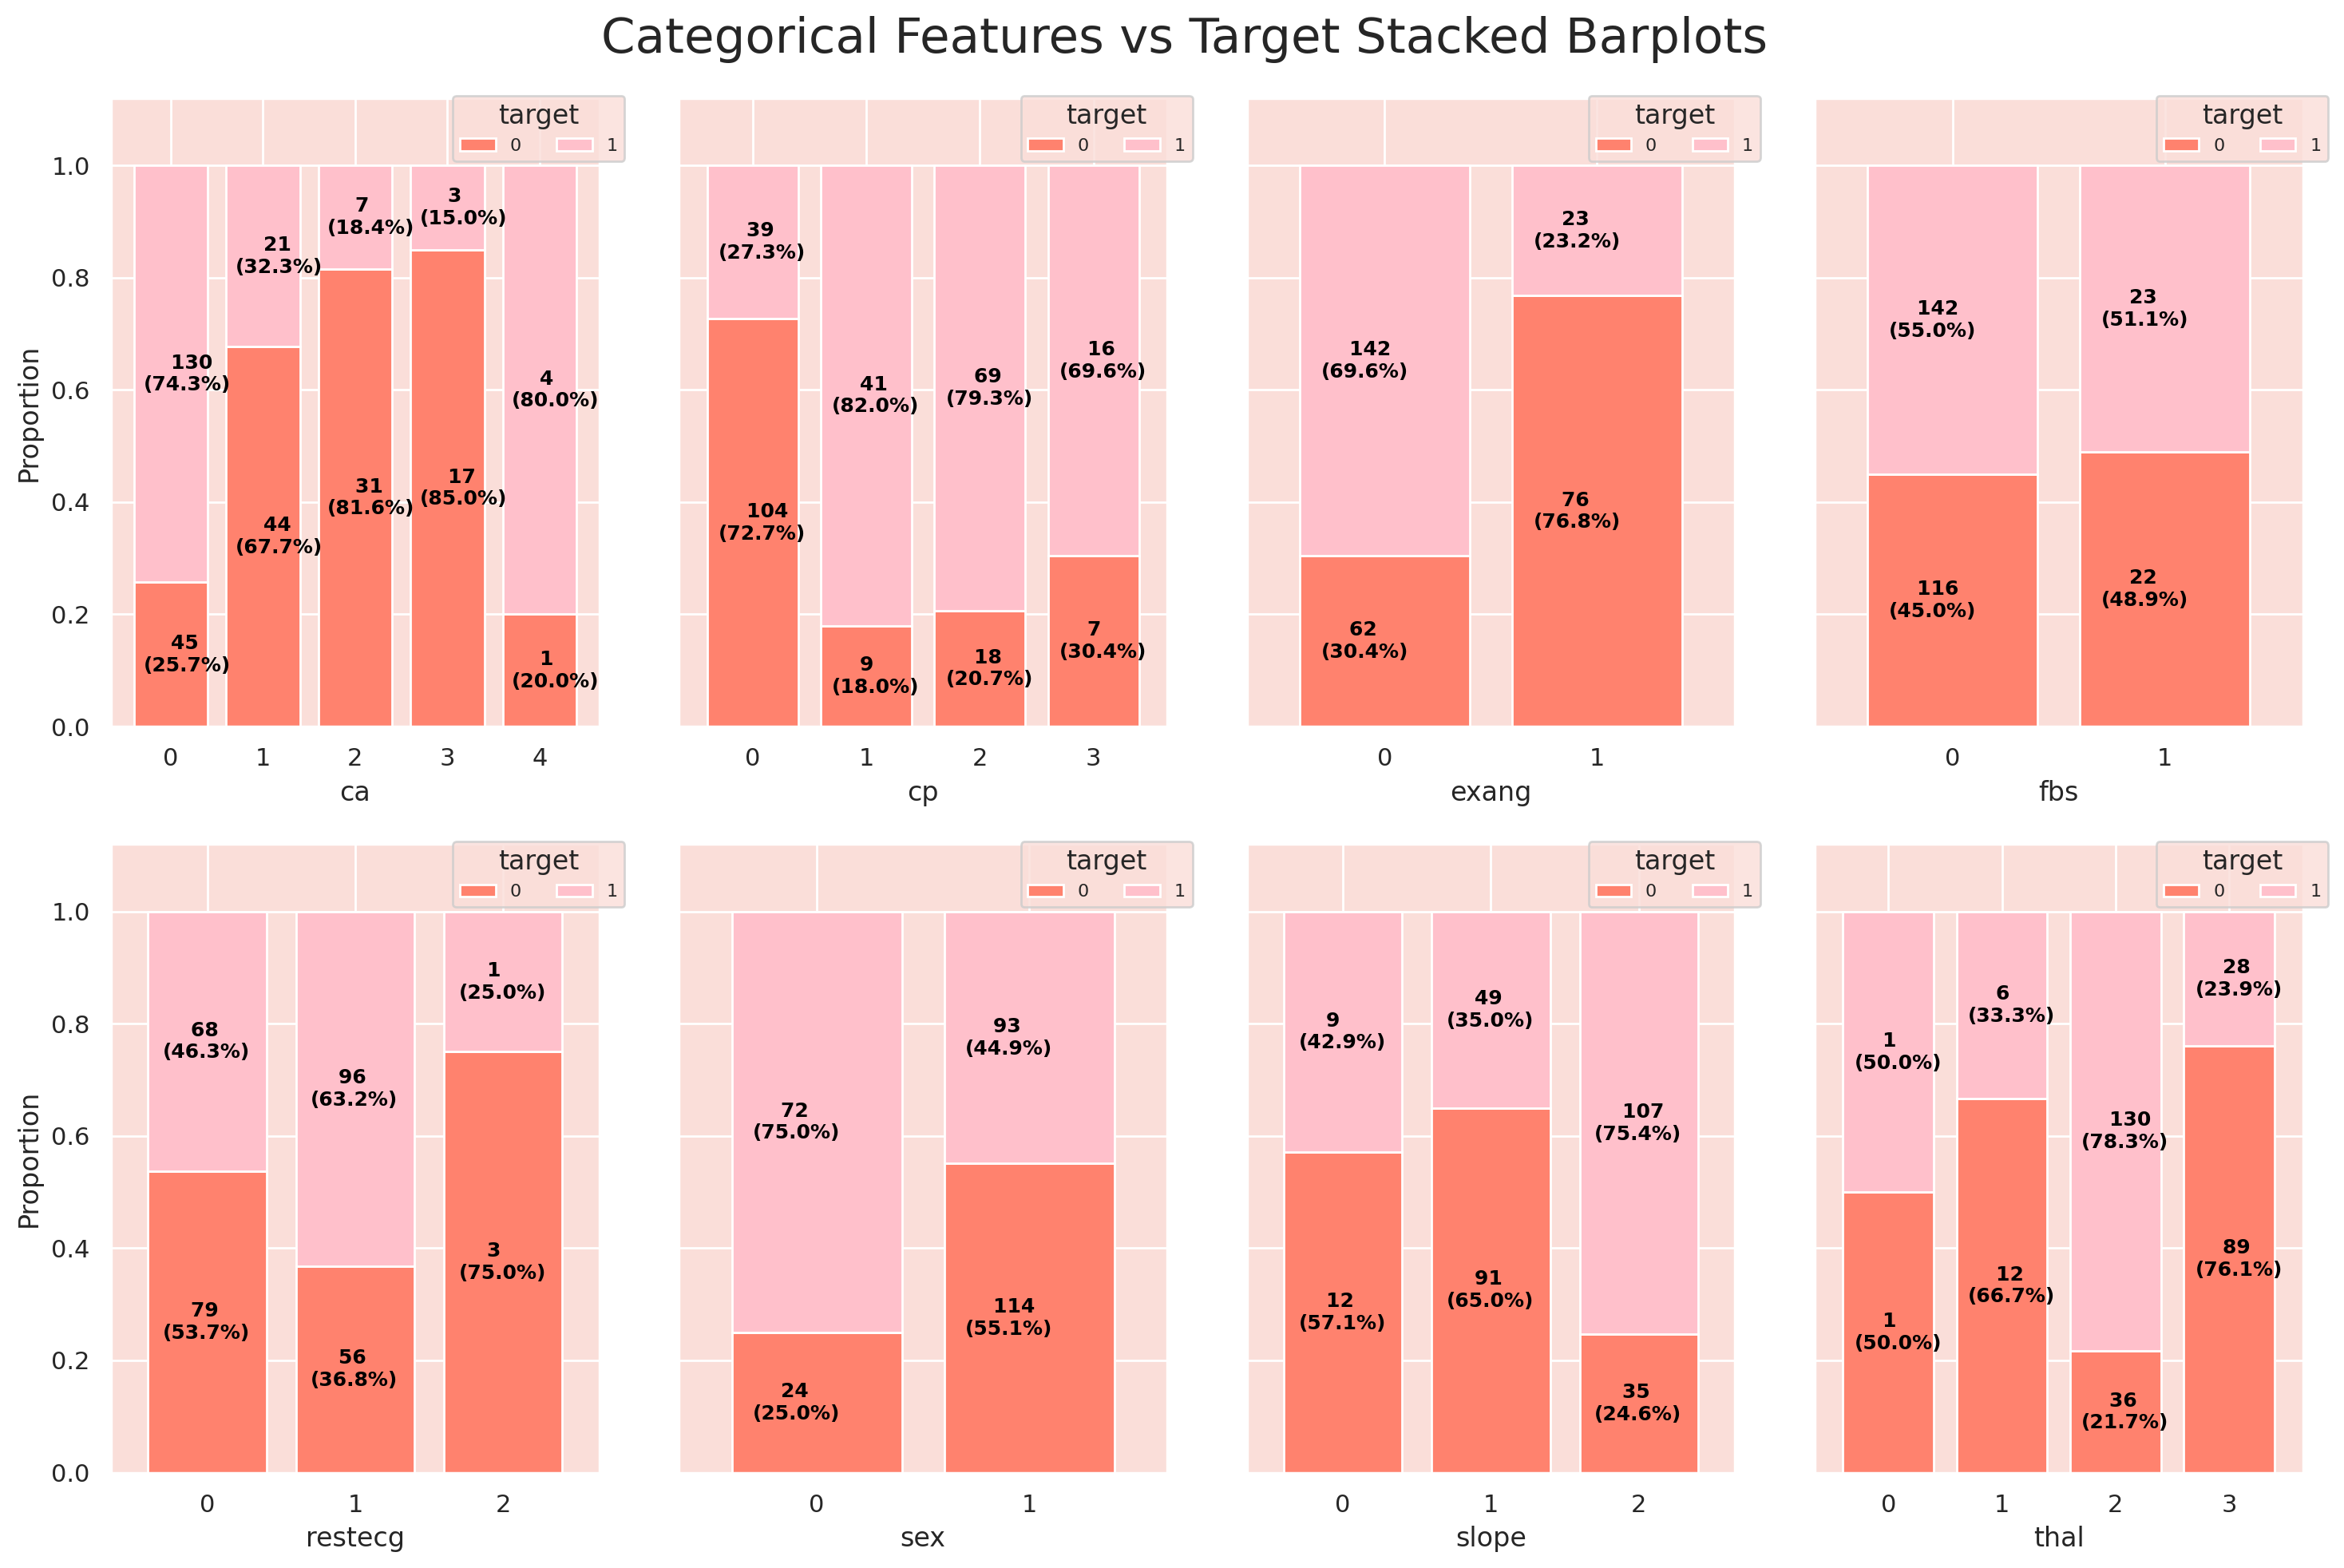

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'pink'])

    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

**Inferences:**

>**Number of Major Vessels (ca):** The majority of patients with heart disease have fewer major vessels colored by fluoroscopy. As the number of colored vessels increases, the proportion of patients with heart disease tends to decrease. Especially, patients with 0 vessels colored have a higher proportion of heart disease presence.

>**Chest Pain Type (cp):** Different types of chest pain present varied proportions of heart disease. Notably, types 1, 2, and 3 have a higher proportion of heart disease presence compared to type 0. This suggests the type of chest pain can be influential in predicting the disease.

>**Exercise Induced Angina (exang):** Patients who did not experience exercise-induced angina (0) show a higher proportion of heart disease presence compared to those who did (1). This feature seems to have a significant impact on the target.

>**Fasting Blood Sugar (fbs):** The distribution between those with fasting blood sugar > 120 mg/dl (1) and those without (0) is relatively similar, suggesting fbs might have limited impact on heart disease prediction.

>**Resting Electrocardiographic Results (restecg):** Type 1 displays a higher proportion of heart disease presence, indicating that this feature might have some influence on the outcome.

>**Sex (sex):** Females (1) exhibit a lower proportion of heart disease presence compared to males (0). This indicates gender as an influential factor in predicting heart disease.

>**Slope of the Peak Exercise ST Segment (slope):** The slope type 2 has a notably higher proportion of heart disease presence, indicating its potential as a significant predictor.

>**Thalium Stress Test Result (thal):** The reversible defect category (2) has a higher proportion of heart disease presence compared to the other categories, emphasizing its importance in prediction.

**In summary, based on the visual representation:**
*   **Higher Impact on Target:** ca, cp, exang, sex, slope, and thal
*  **Moderate Impact on Target:** restecg
*   **Lower Impact on Target:** fbs

## **Step 5 | Data Preprocessing**

### **Step 5.1 | Irrelevant Features Removal**



All features in the dataset appear to be relevant based on our **EDA**. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.

### **Step 5.2 | Missing Value Treatment**

In [65]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

### **Step 5.3 | Outlier Treatment**

I am going to check for outliers using the **IQR method** for the continuous features:

In [66]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [67]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

Upon identifying outliers for the specified continuous features, we found the following:

*   trestbps: 9 outliers
*   chol: 5 outliers
*   thalach: 1 outlier
*   oldpeak: 5 outliers
*   age: No outliers


**Sensitivity to Outliers:**


*   **SVM (Support Vector Machine):** SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.
*   **Decision Trees (DT) and Random Forests (RF):** These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
*   **K-Nearest Neighbors (KNN):** KNN is sensitive to outliers because it relies on distances between data points to make predictions. Outliers can distort these distances.

**Approaches for Outlier Treatment:**
>**Removal of Outliers:** Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

>**Capping Outliers:** Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.

>**Transformations:** Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.

>**Robust Scaling:** Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

**Conclusion:**

Given **the nature of the algorithms (especially SVM and KNN)** and **the small size of our dataset**, direct removal of outliers might not be the best approach. Instead, **we'll focus on applying transformations like Box-Cox in the subsequent steps** to reduce the impact of outliers and make the data more suitable for modeling.

### **Step 5.4 | Categorical Features Encoding**

**One-hot Encoding Decision:**

Based on the feature descriptions, let's decide on one-hot encoding:

*   **Nominal Variables:** These are variables with *no inherent order*. They *should be one-hot encoded* because using them as numbers might introduce an unintended order to the model.
*   **Ordinal Variables:** These variables have an *inherent order*. They *don't necessarily need to be one-hot encoded* since their order can provide meaningful information to the model.



**Given the above explanation:**


*   **sex:** This is a binary variable with two categories (male and female), so it doesn't need one-hot encoding.
*   **cp:** Chest pain type can be considered as nominal because there's no clear ordinal relationship among the different types of chest pain (like Typical angina, Atypical angina, etc.). It should be one-hot encoded.


*   **fbs:** This is a binary variable (true or false), so it doesn't need one-hot encoding.

*   **restecg:** This variable represents the resting electrocardiographic results. The results, such as "Normal", "Having ST-T wave abnormality", and "Showing probable or definite left ventricular hypertrophy", don't seem to have an ordinal relationship. Therefore, it should be one-hot encoded.

*   **exang:** This is a binary variable (yes or no), so it doesn't need one-hot encoding.

*   **slope:** This represents the slope of the peak exercise ST segment. Given the descriptions (Upsloping, Flat, Downsloping), it seems to have an ordinal nature, suggesting a particular order. Therefore, it doesn't need to be one-hot encoded.
*   **ca:** This represents the number of major vessels colored by fluoroscopy. As it indicates a count, it has an inherent ordinal relationship. Therefore, it doesn't need to be one-hot encoded.


*   **thal:** This variable represents the result of a thalium stress test. The different states, like "Normal", "Fixed defect", and "Reversible defect", suggest a nominal nature. Thus, it should be one-hot encoded.




**Summary:**


*   **Need One-Hot Encoding:** cp, restecg, thal
*   **Don't Need One-Hot Encoding:** sex, fbs, exang, slope, ca


In [68]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [69]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0


### **Step 5.5 | Feature Scaling**

**Feature Scaling** is a crucial preprocessing step **for algorithms that are sensitive to the magnitude or scale of features.** Models like **SVM, KNN,** and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. **Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.**


---



**Why We Skip It Now:**
While feature scaling is vital for some models, not all algorithms require scaled data. For instance, **Decision Tree-based models** are scale-invariant. Given our intent to use a mix of models (some requiring scaling, others not), **we've chosen to handle scaling later using pipelines.** This approach lets us apply scaling specifically for models that benefit from it, ensuring flexibility and efficiency in our modeling process.

### **Step 5.6 | Transforming Skewed Features**

**Box-Cox** transformation is a powerful method to stabilize variance and make the data more normal-distribution-like. It's particularly useful when you're unsure about the exact nature of the distribution you're dealing with, as it can adapt itself to the best power transformation. However, the Box-Cox transformation only works for positive data, so one must be cautious when applying it to features that contain zeros or negative values.



---


**Transforming Skewed Features & Data Leakage Concerns:**

When preprocessing data, especially applying transformations like the **Box-Cox**, it's essential to be wary of **data leakage**.

Data leakage refers to a mistake in the preprocessing of data in which information from outside the training dataset is used to transform or train the model. This can lead to overly optimistic performance metrics.



---


**To avoid data leakage and ensure our model generalizes well to unseen data:**

**1- Data Splitting:** We'll first split our dataset into a training set and a test set. This ensures that we have a separate set of data to evaluate our model's performance, untouched during the training and preprocessing phases.

**2- Box-Cox Transformation:** We'll examine the distribution of the continuous features in the training set. If they appear skewed, we'll apply the Box-Cox transformation to stabilize variance and make the data more normal-distribution-like. Importantly, we'll determine the Box-Cox transformation parameters solely based on the training data.

**3- Applying Transformations to Test Data:** Once our transformation parameters are determined from the training set, we'll use these exact parameters to transform our validation/test set. This approach ensures that no information from the validation/test set leaks into our training process.

**4. Hyperparameter Tuning & Cross-Validation:** Given our dataset's size, to make the most of the available data during the model training phase, we'll employ **cross-validation on the training set for hyperparameter tuning**. This allows us to get a better sense of how our model might perform on unseen data, without actually using the test set. The test set remains untouched during this phase and is only used to evaluate the final model's performance.

By following this structured approach, we ensure a rigorous training process, minimize the risk of data leakage, and set ourselves up to get a realistic measure of our model's performance on unseen data.

In [70]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [71]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [72]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

The Box-Cox transformation requires all data to be strictly positive. To transform the oldpeak feature using Box-Cox, we can add a small constant (e.g., 0.001) to ensure all values are positive:

In [73]:
# Adding a small constant to 'oldpeak' to make all values positive
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

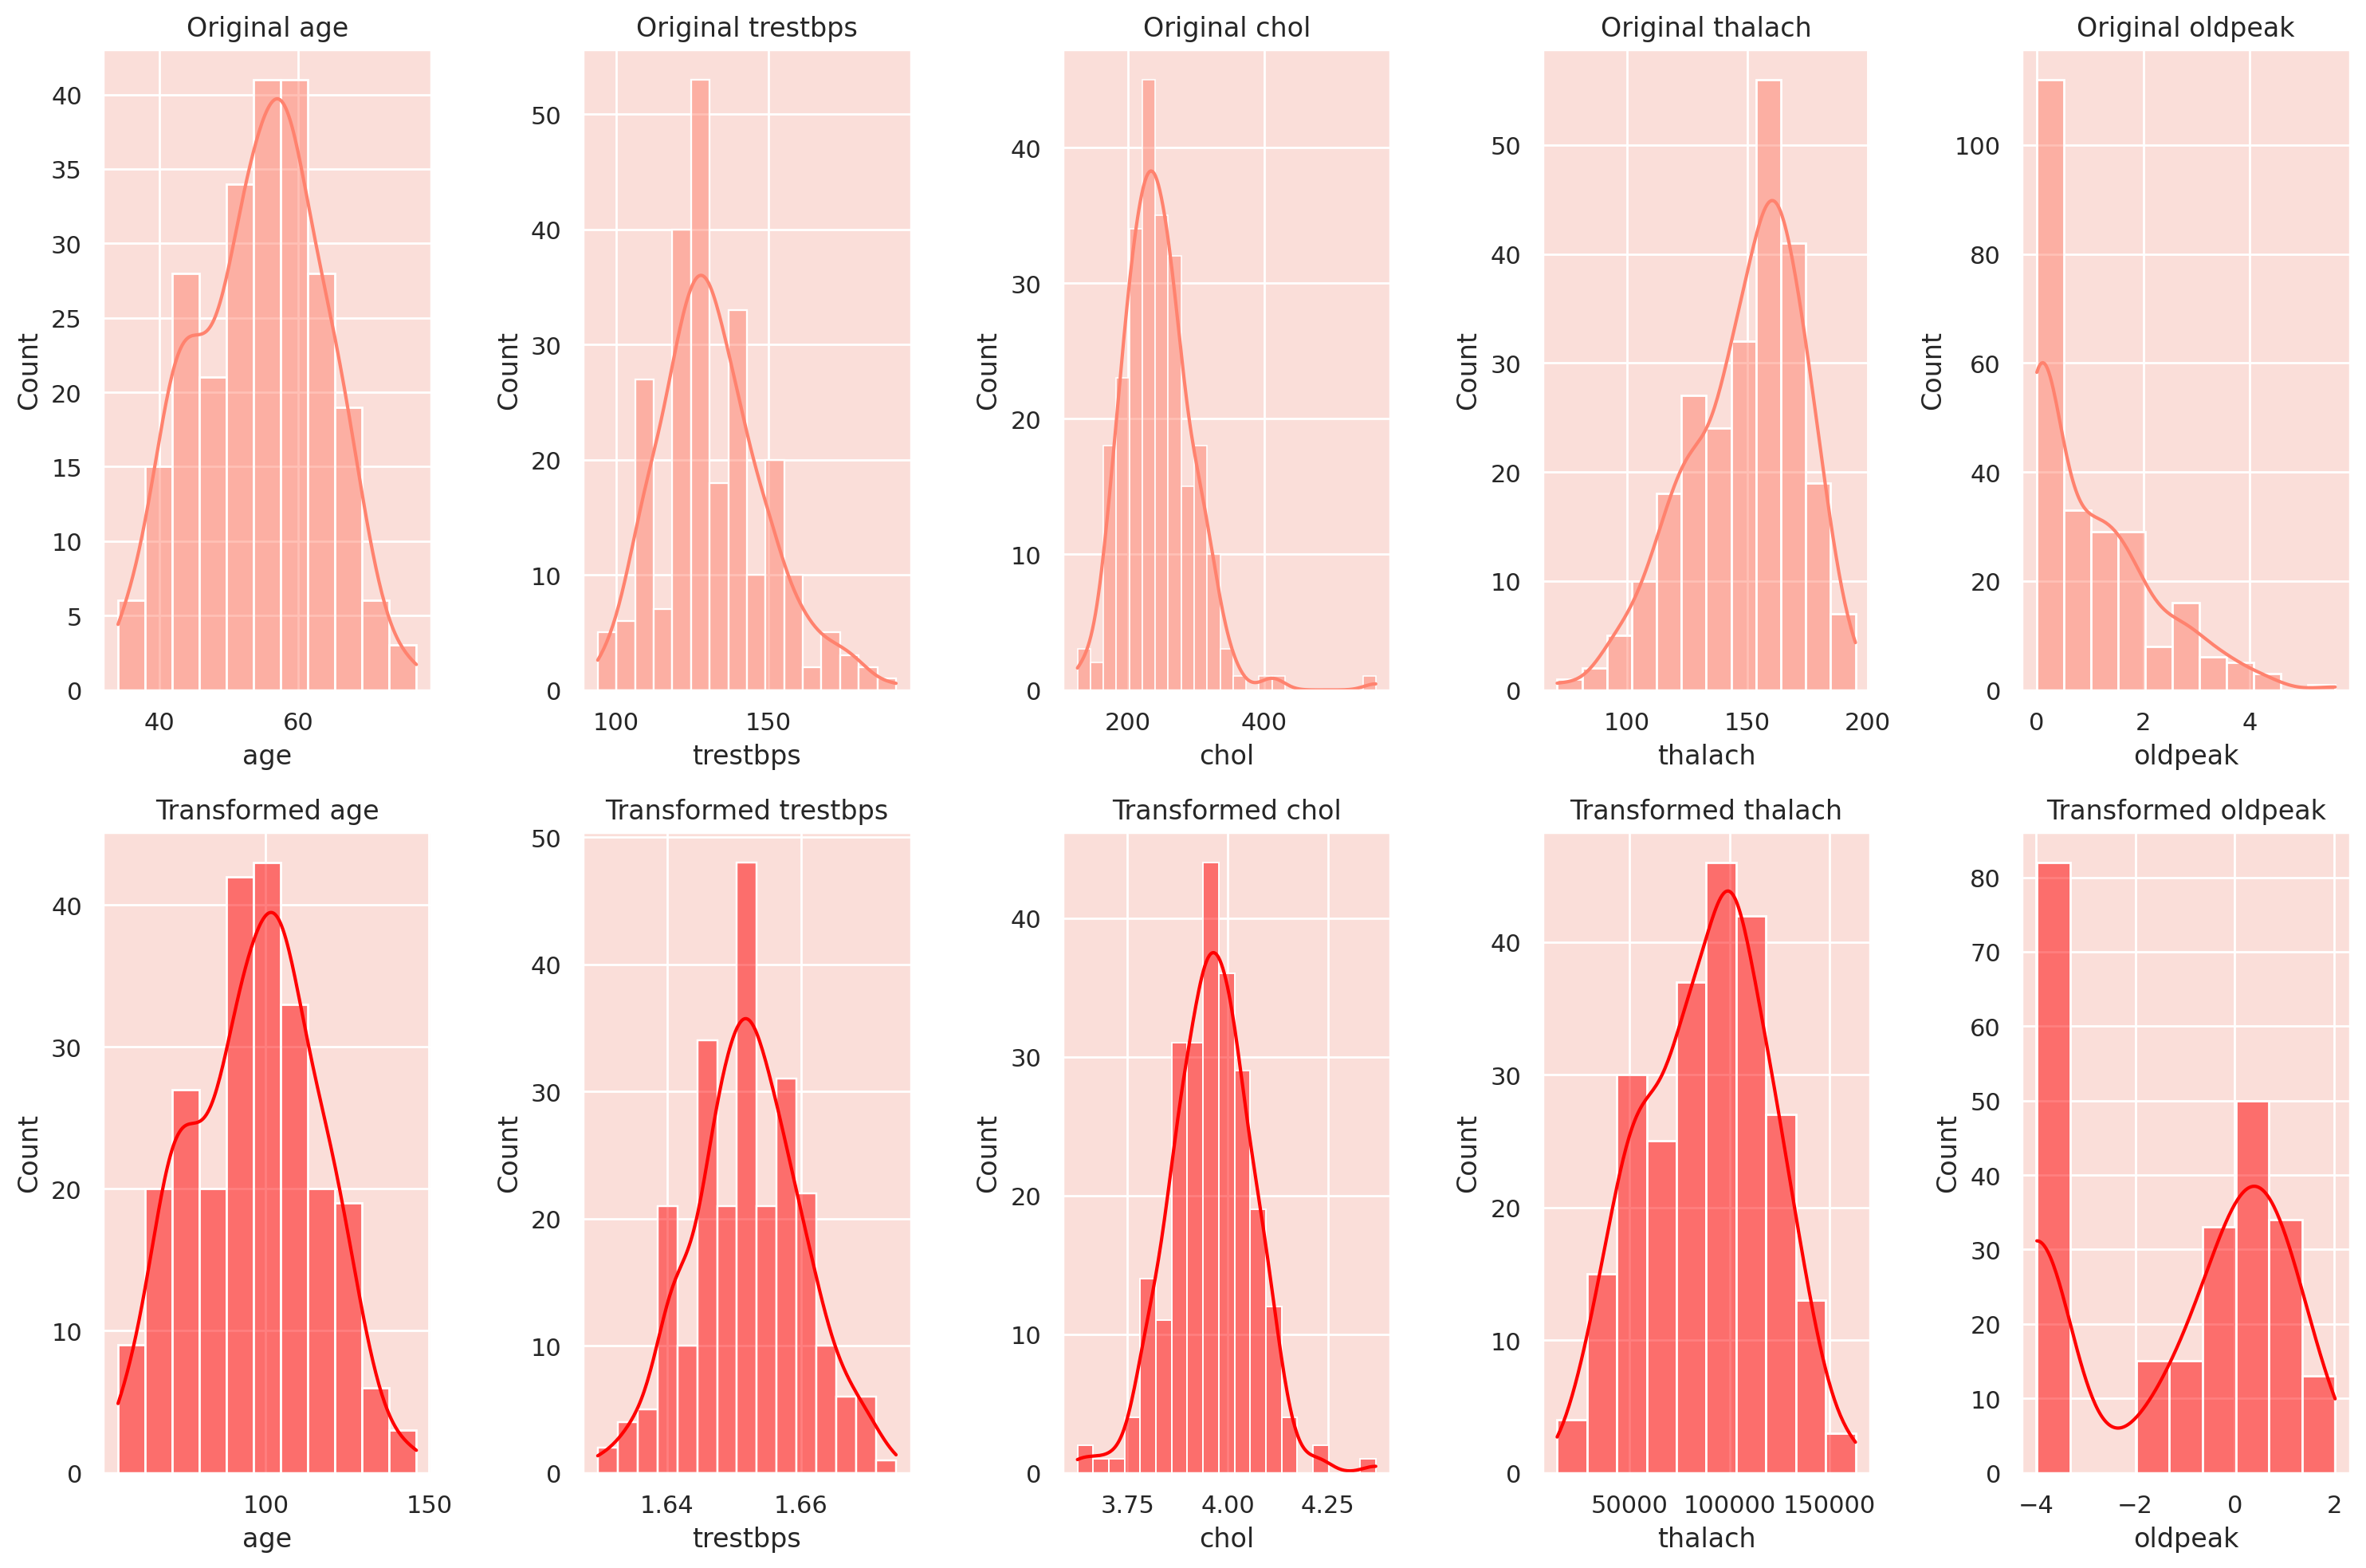

In [74]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')


# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

**Inference:**

**1- age:** The transformation has made the age distribution more symmetric, bringing it closer to a normal distribution.

**2- Trestbps:** The distribution of trestbps post-transformation appears to be more normal-like, with reduced skewness.

**3- Chol:** After applying the Box-Cox transformation, chol exhibits a shape that's more aligned with a normal distribution.

**4- Thalach:** The thalach feature was already fairly symmetric before the transformation, and post-transformation, it continues to show a similar shape, indicating its original distribution was close to normal.

**5- Oldpeak:** The transformation improved the oldpeak distribution, but it still doesn't perfectly resemble a normal distribution. This could be due to the inherent nature of the data or the presence of outliers. To enhance its normality, we could consider utilizing advanced transformations such as the Yeo-Johnson transformation, which can handle zero and negative values directly.

**Conclusion:**
Transforming features to be more normal-like primarily helps in mitigating the impact of outliers, which is particularly beneficial for distance-based algorithms like **SVM** and **KNN**. By reducing the influence of **outliers**, we ensure that these algorithms can compute distances more effectively and produce more reliable results.

In [75]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
269,99.775303,1,1.652121,4.044510,1,34193.175862,1,0.490856,0,0,0,0,0,0,0,0,0,1
191,104.060224,1,1.651136,3.909224,0,61564.541974,1,0.846853,1,3,0,0,0,0,0,0,0,1
15,87.096543,0,1.646937,3.916242,0,97354.732537,0,0.490856,1,0,0,1,0,1,0,0,1,0
224,95.519131,1,1.641028,3.960430,0,55975.802227,1,1.130195,1,1,0,0,0,1,0,0,0,1
250,89.190680,1,1.656716,4.069854,0,51729.405015,1,1.634849,1,3,0,0,0,1,0,0,0,1


## **Step 6 | Decision Tree Model Building**


### **Step 6.1 | DT Base Model Definition**

In [76]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

### **Step 6.2 | DT Hyperparameter Tuning**

🔍 **Note:** In medical scenarios, especially in the context of diagnosing illnesses, **it's often more important to have a high recall (sensitivity) for the positive class (patients with the condition)**. A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.



---
*I am establishing a function to determine the optimal set of hyperparameters that **yield the highest recall for the model**. This approach ensures a reusable framework for hyperparameter tuning of subsequent models:*


In [77]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters



---
*I'll set up the hyperparameters grid and utilize the **tune_clf_hyperparameters** function to pinpoint the optimal hyperparameters for our DT model:*


In [78]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [79]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [80]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


### **Step 6.3 | DT Model Evaluation**

In [81]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



In [82]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61





---
Given that the metric values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.




---
Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:


In [83]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df

In [84]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


## **Step 7 | Random Forest Model Building**

### **Step 7.1 | RF Base Model Definition**

In [85]:
rf_base = RandomForestClassifier(random_state=0)

### **Step 7.2 | RF Hyperparameter Tuning**

Afterward, I am setting up the hyperparameters grid and utilize the **tune_clf_hyperparameters** function to pinpoint the optimal hyperparameters for our RF model:

In [105]:
# Hyperparameter grid for RF
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [106]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

### **Step 7.3 | RF Model Evaluation**

## **Step 8 | KNN Model Building**

### **Step 8.1 | KNN Base Model Definition**

First of all, let's define the base KNN model and set up the pipeline with scaling:

In [89]:
# Define the base KNN model and set up the pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

### **Step 8.2 | KNN Hyperparameter Tuning**

I'll set up the hyperparameters grid and utilize the **tune_clf_hyperparameters** function to pinpoint the optimal hyperparameters for our KNN pipeline:

In [90]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [91]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)

In [92]:
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}



### **Step 8.3 | KNN Model Evaluation**

In [93]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [94]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



The KNN model's consistent scores across training and test sets indicate no overfitting.

In [95]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


## **Step 9 | SVM Model Building**

### **Step 9.1 | SVM Base Model Definition**

First, let's define the base SVM model and set up the pipeline with scaling:

In [96]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

### **Step 9.2 | SVM Hyperparameter Tuning**

Let's configure the hyperparameters grid and employ the **tune_clf_hyperparameters** function to determine the best hyperparameters for our SVM pipeline:

In [97]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}

In [98]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)

In [99]:
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


### **Step 9.3 | SVM Model Evaluation**

In [100]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       110
           1       0.71      0.96      0.82       132

    accuracy                           0.77       242
   macro avg       0.82      0.75      0.75       242
weighted avg       0.81      0.77      0.76       242



In [101]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



In [102]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79


✅ Inference:

The **recall of 0.97 for class 1** indicates that almost all the **true positive cases** **(i.e., patients with heart disease) **are correctly identified. This high recall is of utmost importance in a medical context, where missing a patient with potential heart disease could have dire consequences.

However, it's also worth noting the balanced performance of the model. With an F1-score of 0.83 for class 1, it's evident that the model doesn't merely focus on maximizing recall at the expense of precision. This means the reduction in False Negatives hasn't significantly increased the False Positives, ensuring that the cost and effort of examining healthy individuals are not unnecessarily high.

Overall, the model's performance is promising for medical diagnostics, especially when prioritizing the accurate identification of patients with heart disease without overburdening the system with false alarms.

## **Step 10 | Conclusion**



---


In the critical context of diagnosing heart disease, **our primary objective is to ensure a high recall for the positive class.** It's imperative to accurately
identify every potential heart disease case, as even one missed diagnosis could have dire implications. However, while striving for this high recall, it's essential to maintain a balanced performance to avoid unnecessary medical interventions for healthy individuals. We'll now evaluate our models against these crucial medical benchmarks.






In [103]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79
DT,0.80,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


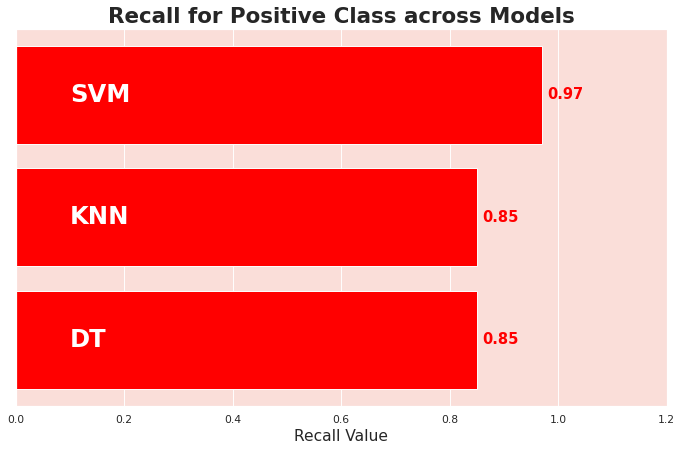

In [104]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

The SVM model demonstrates a commendable capability in recognizing potential heart patients. With a recall of 0.97 for class 1, it's evident that almost all patients with heart disease are correctly identified. This is of paramount importance in a medical setting. However, the model's balanced performance ensures that while aiming for high recall, it doesn't compromise on precision, thereby not overburdening the system with unnecessary alerts.